# Wprowadzenie

Cel ćwiczenia:
— Praktyczne zapoznanie sie z liniowa metoda redukcji wymiaru PCA
— Przyswojenie pojec: komponent wiodacy, macierz kowariancji, wewnetrzna
wymiarowosc przestrzeni cech, biplot

Principal Component Analysis (PCA) jest bezparametryczna, liniowa metoda redukcji wymiaru szeroko wykorzystywana w analizie i przetwarzaniu danych w postaci wektorów cech.

In [116]:
import numpy as np
import pandas as pf
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

Wykorzystane zbiory danych:
1. nyt-frame - Zbiór danych o rozmiarze 101 × 4433 zawierajacy 101 wektorów cech reprezentujacych artykuły New York Times w dwóch kategoriach: muzyka i sztuka.
2. 04cars - Zbiór danych o rozmiarze 387×20 zawierajacy 386 wektorów cech reprezentujacych własnosci samochodów produkowanych w roku 2004.

# Analiza zbioru NYT

In [117]:
import pandas as pd
df = pd.read_csv("data/nyt-frame.csv", header = 0)
data = df.iloc[:,9:]
array = data.values

In [118]:
header = list(df.columns.values[9:])
sample_word = np.random.choice(header, 20, replace=False)
print(sample_word)

['war' 'sits' 'brothers' 'neither' 'wind' 'uses' 'nonetheless' 'homage'
 'chicago' 'anger' 'remarks' 'thinking' 'dallas' 'clients' 'drummer'
 'cozy' 'copyright' 'seems' 'designed' 'renovated']


# NYT PCA 

In [119]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(array)

In [120]:
# Polecenie 1: Dla pierwszego komponentu wiodacego wyswietl 15 elementów o najwieszej wartosci (wraz z nazwami kolumn - słowami). Jakim słowom odpowiadaja najwieksze wartosci pierwszego komponentu wiodacego?

indices = list(zip(*sorted(
    list(enumerate(pca.components_[0])),
    key=lambda x: x[1], reverse=True
)[:15]))[0]

for i in indices:
    print(i, header[i])

3530 she
1794 her
2517 ms
1875 i
3394 said
2498 mother
875 cooper
2538 my
2761 painting
3013 process
2762 paintings
1899 im
2516 mrs
1771 he
2373 me


In [121]:
# Polecenie 2: Dla pierwszego komponentu wiodacego wyswietl 15 elementów o najmniejszej wartosci (wraz z nazwami kolumn - słowami). Jakim słowom  odpowiadaja najmniejsze wartosci pierwszego komponentu wiodacego?

indices = list(zip(*sorted(
    list(enumerate(pca.components_[0])),
    key=lambda x: x[1], reverse=False
)[:15]))[0]

for i in indices:
    print(i, header[i])

2529 music
4099 trio
3963 theater
2707 orchestra
799 composers
2691 opera
3964 theaters
2300 m
3032 program
2905 players
1457 festival
1202 east
4401 y
2059 jersey
3898 symphony


In [122]:
# P3: Powtórz eksperyment dla drugiego komponentu wiodacego. Skomentuj uzyskane wyniki.

indices = list(zip(*sorted(
    list(enumerate(pca.components_[1])),
    key=lambda x: x[1], reverse=True
)[:15]))[0]

for i in indices:
    print(i, header[i])

1794 her
3530 she
3963 theater
2691 opera
2517 ms
1875 i
1851 hour
3408 sang
3022 production
1457 festival
2529 music
2530 musical
3665 songs
2707 orchestra
4233 vocal


In [123]:
indices = list(zip(*sorted(
    list(enumerate(pca.components_[1])),
    key=lambda x: x[1], reverse=False
)[:15]))[0]

for i in indices:
    print(i, header[i])

235 art
2527 museum
1901 images
244 artists
1139 donations
2528 museums
2761 painting
3922 tax
2762 paintings
3450 sculpture
1606 gallery
3451 sculptures
2757 painted
4315 white
3502 service


## Komentarz

*Analiza pierwszego komponentu:*
Słowa o największych wartościach takie jak "she", "her", "ms", "mother", "painting", "paintings" sugerują silny skupienie na tematach związanych z kobietami oraz sztuką (zwłaszcza malarstwem), można je też traktować jako zaimki albo materiały, które odnoszą się bezpośrednio do artystów lub ich historii, a nie samej sztuki.

Słowa o najmniejszych wartościach, takie jak "trio", "theater", "orchestra", "composers", "opera", "symphony" wskazują na silne powiązanie z muzyką, a szczególnie z muzyką wykonywaną przez orkiestry, opery i w teatrach. Wyniki te sugerują, że te tematy są w pewnym sensie przeciwstawne do tych reprezentowanych przez słowa o największych wartościach w pierwszym komponencie, co może oznaczać, że przeciwna strona pierwszego komponentu odnosi się bardziej do sztuki.


*Analiza drugiego komponentu:*

Największe wartości dla drugiego komponentu koncentrują się głównie wokół tematów związanych z muzyką i teatrem, takich jak "theater", "opera", "music", "musical", "songs", "orchestra". Obecność osobowych zaimków "her" i "she" wskazuje, że może istnieć silny nacisk na postacie kobiece lub wykonawczynie w tych dziedzinach. 

Z kolei słowa z najmniejszymi wartościami dotyczą sztuki wizualnej: "art", "museum", "images", "artists", "painting", "sculpture". Wskazują one na silne skupienie na sztuce, jej twórcach, miejscach wystawiania (muzea, galerie) oraz na samych dziełach sztuki (malarstwo, rzeźba). Występuja też słowa jak "tax", "servies" którym brak bezpośredniego odniesienia do muzyki czy teatru. Drugi komponent może służyć jako rozróżnienie między treściami skupionymi na artystach i sztuce, a tymi skoncentrowanymi na obiekcie lub szeroko rozumianej kulturze jako dziedzinie.

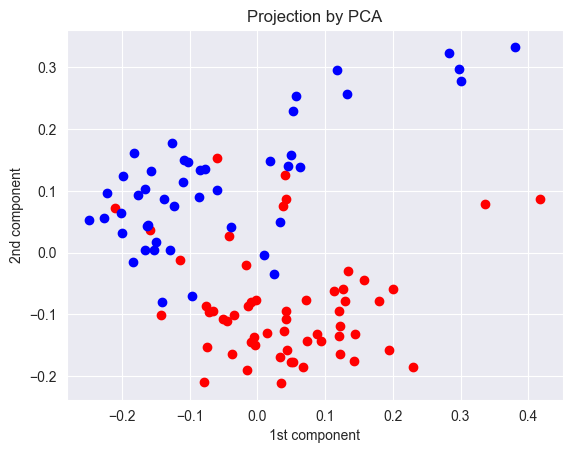

In [124]:
# P4: Dokonaj wizualizacji wektorów cech zrzutowanych na 2(3) pierwsze komponenty wiodace. Zaznacz dwie klasy (art, music) oddzielnymi kolorami.

reds = (df['class.labels']=="art")
blues = (df['class.labels']=="music")

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], c="red")
plt.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], c="blue")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

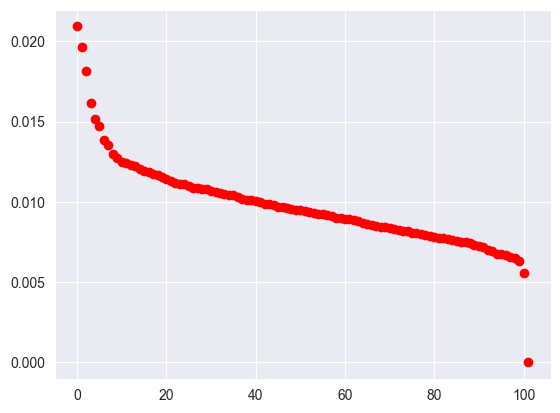

0.15773478029003482


In [125]:
# P5: Narysuj wykres zaleznosci wartosci wariancji od numeru kierunku wiodacego k. Jaka czesc wariancji zostaje zachowana po wykonaniu projekcji na pierwsze 10 komponentów wiodacych?

variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, "ro")
plt.show()
print(sum(variance_ratio[0:10]))

## Komentarz

Na wykresie widać, że punkty czerwone (sztuka) i niebieskie (muzyka) formują dość wyraźnie oddzielne klastery, choć z pewnym nakładaniem się na siebie.

Idąc tokiem mojej poprzedniej analizy, obserwuję wyraźną tendencję do grupowania się danych dotyczących muzyki (blues) w górnej części wykresu. Sugeruje to silne powiązanie tych punktów z tematyką utworów muzycznych, sztuki teatralnej oraz sylwetkami artystów z tych obszarów.Analiza pierwszych dwóch komponentów wskazuje, że w kontekście muzyki istnieje skłonność do częstszego akcentowania aspektów artystycznych. Z kolei, rozpatrując dziedzinę sztuki (oznaczoną jako "reds"), odnotowujemy zróżnicowanie w obrębie pierwszego komponentu, co sugeruje większe skupienie na osobowościach artystów i ich historii. Natomiast nachylenie w dół w drugim komponencie podkreśla bardziej wszechstronne podejście do analizy tej sfery kultury, włączając w to instytucje z nią związane.


Wartość 0.1577347802900349 oznacza, że te komponenty razem przechwytują około 15.77% całkowitej wariancji zbioru danych. Jeśli zredukujemy swój zbiór danych do tych 10 komponentów, zachowamy w nich około 15.77% informacji zawartych w oryginalnym, pełnowymiarowym zbiorze danych.

# Analiza zbioru 04Cars.

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
df = pd.read_csv("data/04cars-data.csv", header = 0)
header = list(df.columns.values[9:])
attributes = list(df.columns.values[-11:])
data = df.iloc[:, -11:]
array = data.values
attributes

['Retail Price',
 'Dealer Cost',
 'Engine Size (l)',
 'Cyl',
 'HP',
 'City MPG',
 'Hwy MPG',
 'Weight',
 'Wheel Base',
 'Len',
 'Width']

In [128]:
df.head(10)

,Vehicle Name,Small/Sporty/ Compact/Large Sedan,Sports Car,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,Acura 3.5 RL 4dr,1,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,Acura 3.5 RL w/Navigation 4dr,1,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,Acura MDX,0,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,Acura NSX coupe 2dr manual S,0,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,Acura RSX Type S 2dr,1,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68
5,Acura TL 4dr,1,0,0,0,0,0,0,0,33195,30299,3.2,6,270,20,28,3575,108,186,72
6,Acura TSX 4dr,1,0,0,0,0,0,0,0,26990,24647,2.4,4,200,22,29,3230,105,183,69
7,Audi A4 1.8T 4dr,1,0,0,0,0,0,0,0,25940,23508,1.8,4,170,22,31,3252,104,179,70
8,Audi A4 3.0 4dr,1,0,0,0,0,0,0,0,31840,28846,3.0,6,220,20,28,3462,104,179,70
9,Audi A4 3.0 convertible 2dr,1,0,0,0,0,0,0,0,42490,38325,3.0,6,220,20,27,3814,105,180,70


In [129]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(array)

In [130]:
pca = PCA()
X_pca = pca.fit_transform(array_normalized)

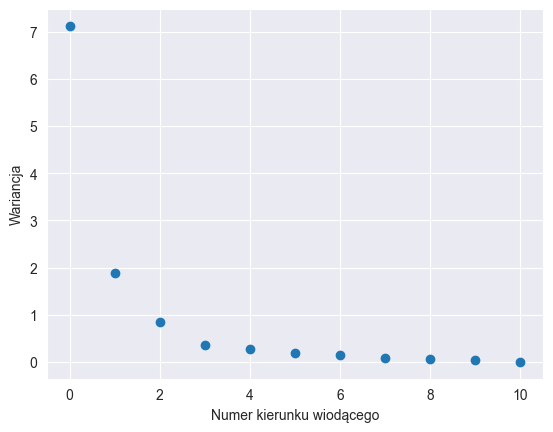

In [131]:
plt.scatter(np.arange(11), pca.explained_variance_)
plt.xlabel("Numer kierunku wiodącego")
plt.ylabel("Wariancja")
plt.show()

In [132]:
#Jaka czesc wariancji zostaje zachowana przy redukcji wymiarowosci do 2 i 3?
explained_variance = pca.explained_variance_ratio_
print(f"Wyjaśniona wariancja dla 1. komponentu: {explained_variance[0]}")
print(f"Wyjaśniona wariancja dla 2. komponentu: {explained_variance[1]}")
print(f"Wyjaśniona wariancja dla 3. komponentu: {explained_variance[2]}")
print(f"Suma dla pierwszych 3 komponentów {explained_variance[0] + explained_variance[1] + explained_variance[2]}")

Wyjaśniona wariancja dla 1. komponentu: 0.645876220979663
Wyjaśniona wariancja dla 2. komponentu: 0.1712658879905262
Wyjaśniona wariancja dla 3. komponentu: 0.07724802592404484
Suma dla pierwszych 3 komponentów 0.894390134894234


# Komentarz
Pierwszy komponent analizy PCA wyjaśnia około 64.59% wariancji danych, co wskazuje, że jest to najbardziej znaczący kierunek zmienności w zestawie danych. Drugi komponent wyjaśnia dodatkowe 17.13% wariancji, natomiast trzeci komponent przyczynia się 7.72%. Suma wyjaśnionej wariancji dla pierwszych trzech komponentów wynosi około 89.44%, co oznacza, że te trzy komponenty razem reprezentują znaczną część informacji zawartej w oryginalnym zestawie danych.

In [133]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
print("Attribute, PC1, PC2")
for i in range(0,pc1.shape[0]):
    print(attributes[i] + ":" + repr(pc1[i]) + ":" + repr(pc2[i]))

Attribute, PC1, PC2
Retail Price:-0.26375044344403437:0.46850869750253865
Dealer Cost:-0.26231863875309536:0.4701465851382258
Engine Size (l):-0.34708049202520097:-0.015347186463713802
Cyl:-0.3341887576286371:0.07803201087501868
HP:-0.3186022584840293:0.2922134761391821
City MPG:0.3104817267323128:-0.003365935761659042
Hwy MPG:0.3065886385804444:-0.010964460145348603
Weight:-0.3363293669404879:-0.16746357154787045
Wheel Base:-0.2662100335710542:-0.4181771069592043
Len:-0.2567901876706821:-0.4084113806687545
Width:-0.29605459141706103:-0.31289135016250713


Text(0, 0.5, 'Kierunek wiodący')

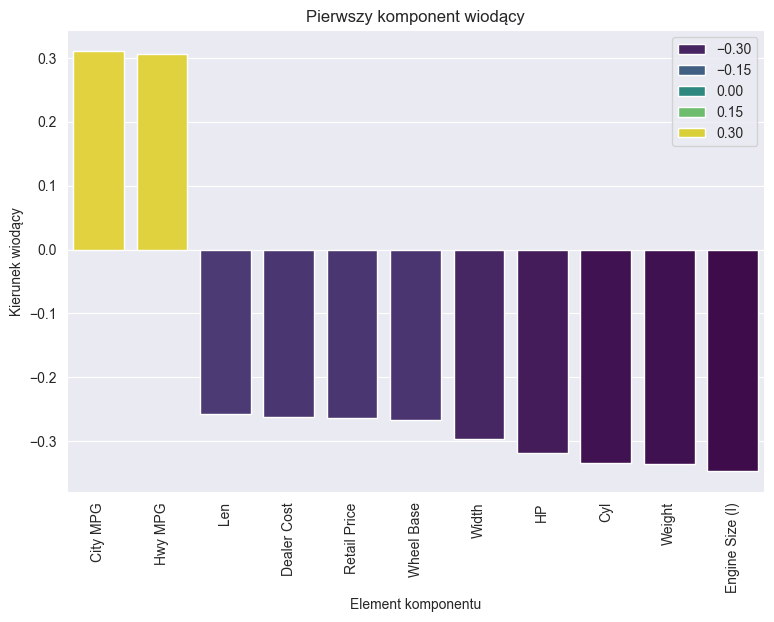

In [134]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.barplot(x=attributes, y=pca.components_[0], order=np.array(attributes)[np.argsort(pca.components_[0])[::-1]], palette='viridis',hue=pca.components_[0])
plt.xticks(rotation=90)
plt.title("Pierwszy komponent wiodący")
plt.xlabel("Element komponentu")
plt.ylabel("Kierunek wiodący")

Text(0, 0.5, 'Kierunek wiodący')

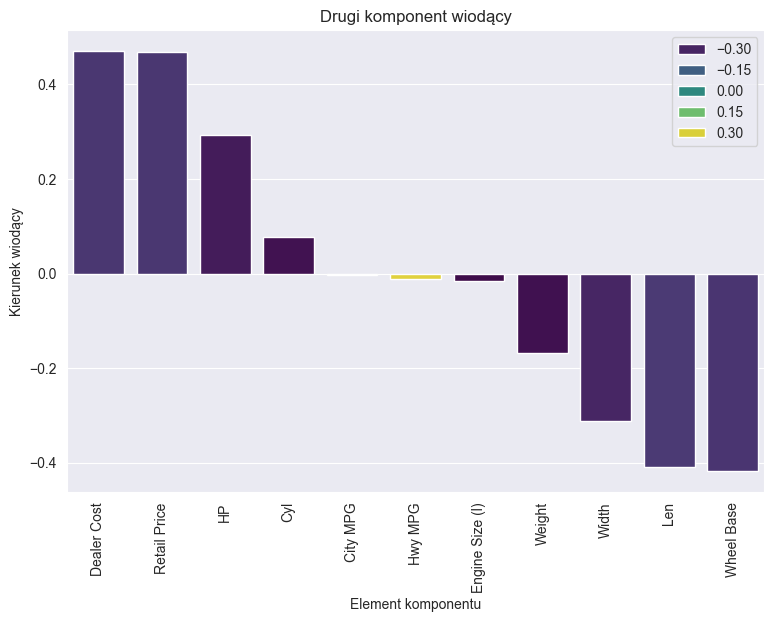

In [135]:
plt.figure(figsize=(9,6))
sns.barplot(x=attributes, y=pca.components_[1], order=np.array(attributes)[np.argsort(pca.components_[1])[::-1]], palette='viridis',hue=pca.components_[0])
plt.xticks(rotation=90)
plt.title("Drugi komponent wiodący")
plt.xlabel("Element komponentu")
plt.ylabel("Kierunek wiodący")

[]

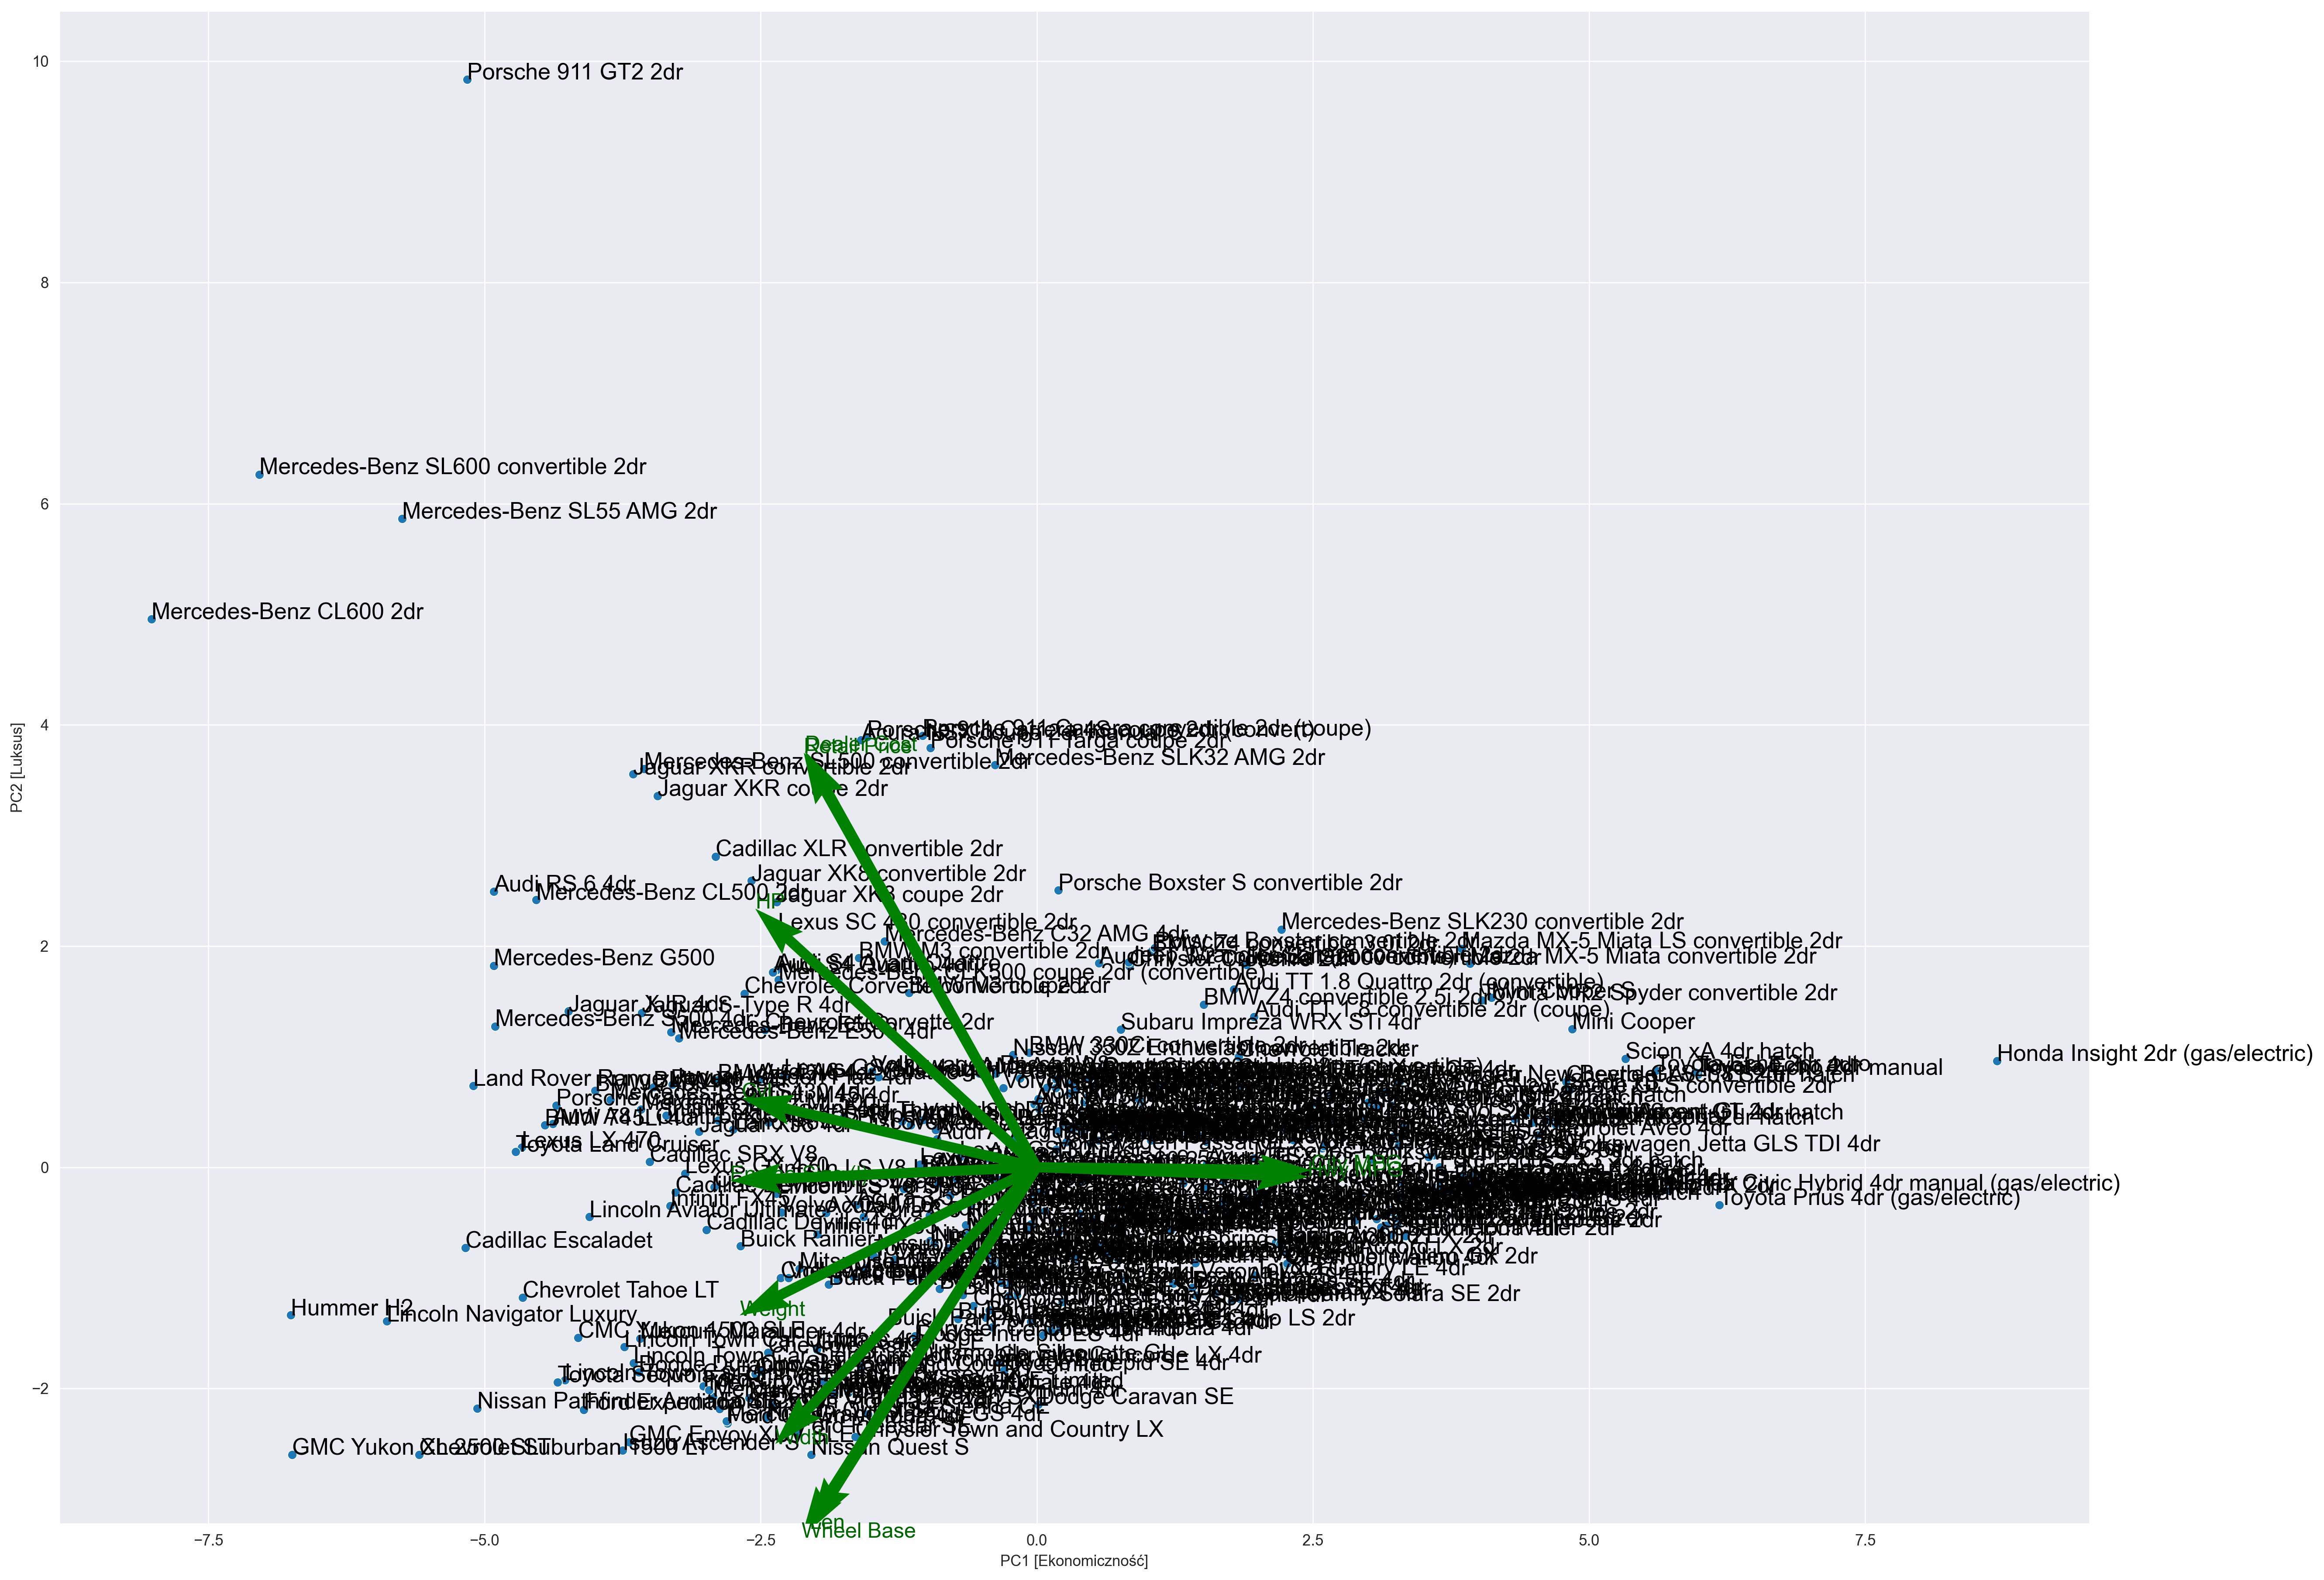

In [136]:
# Biplot

plt.figure(figsize=(24,18))
sp = sns.scatterplot(x=X_pca[...,0], y=X_pca[...,1])

for idx in range(0, X_pca.shape[0]):
    sp.text(X_pca[idx,0], X_pca[idx, 1], df['Vehicle Name'][idx], size=15, color='black')
    
directions = pca.components_[:2,:] @ np.identity(len(attributes))*8
sp.quiver(np.zeros_like(directions[0,:]), np.zeros_like(directions[1,:]), directions[0,:], directions[1,:], angles='xy', scale_units='xy', scale=1, color='green', width=0.005, zorder=20)

for i, txt in enumerate(attributes):
    plt.text(directions[0,i], directions[1,i], txt, fontsize=14,color='darkgreen')
    
plt.xlabel("PC1 [Ekonomiczność]")
plt.ylabel("PC2 [Luksus]")
plt.gcf().set_dpi(250)
plt.plot()

# Komentarz

Na podstawie zaprezentowanych wykresów, pierwszy komponent główny (PCA1) wydaje się skoncentrowany na cechach związanych ze zużyciem paliwa, takich jak City MPG i Hwy MPG, które mają wysokie wartości w tym komponencie. To sugeruje, że PCA1 może reprezentować oszczędność paliwa jako główną osią zmienności w danych samochodowych. Na wykresie powinno to obiawiać sie tym, że po prawej stronie znajdować się będą samochody ze stosunkowo niskim spalaniem, a po lewej te z większym.

Wartości bliskie zeru na wykresie obciążeń PCA dla danego komponentu oznaczają, że odpowiadające im zmienne mają niską korelację z tym komponentem i nie przyczyniają się znacząco do wariancji, którą ten komponent wyjaśnia. 

Drugi komponent główny (PCA2) wykazuje silne skojarzenia z cechami związanymi z kosztami i mocą, takimi jak Dealer Cost i Retail Price, które mają wysokie wartości, oraz City MPG i Hwy MPG, które mają niskie wartości w tym komponencie. Daje to do zrozumienia, że PCA2 może odzwierciedlać wartości między wydajnością, a kosztem samochodów. Teorytycznie wyżej na wykresie powinny znajdować się samochody bardziej luksusowe.

Taka interpretacja jest mniej więcej odzwierciedlona na ostatnim wykresie przedstawiającym jak poszczególne modele samochodów wpasowują sie w wykres tych 2 komponentów.

# Analiza zbioru eigenfaces w oparciu o zbiór danych LFW.

In [137]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

In [138]:
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

In [139]:
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1560
n_features: 1850
n_classes: 12


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [141]:
# Redukcja do 100 wymiarów
pca_100 = PCA(n_components=100)
X_train_pca_100 = pca_100.fit_transform(X_train)
X_test_pca_100 = pca_100.transform(X_test)

# Redukcja do 50 wymiarów
pca_50 = PCA(n_components=50)
X_train_pca_50 = pca_50.fit_transform(X_train)
X_test_pca_50 = pca_50.transform(X_test)

In [142]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Funkcja do trenowania modeli i wyświetlania wyników
def train_and_evaluate(X_train, X_test, y_train, y_test):
    models = {
        "MLP": MLPClassifier(random_state=1, max_iter=1000),
        "SVM": SVC(random_state=1)
    }
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"{name} Classification Report:")
        print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

# Trenowanie i ocena dla 100 komponentów
print("===== 100 Components =====")
train_and_evaluate(X_train_pca_100, X_test_pca_100, y_train, y_test)

# Trenowanie i ocena dla 50 komponentów
print("===== 50 Components =====")
train_and_evaluate(X_train_pca_50, X_test_pca_50, y_train, y_test)

===== 100 Components =====
MLP Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.63      0.89      0.74        19
     Colin Powell       0.86      0.79      0.82        77
  Donald Rumsfeld       0.79      0.61      0.69        36
    George W Bush       0.85      0.94      0.89       158
Gerhard Schroeder       0.84      0.67      0.74        39
      Hugo Chavez       0.76      0.62      0.68        21
   Jacques Chirac       0.70      0.44      0.54        16
    Jean Chretien       0.73      0.67      0.70        12
    John Ashcroft       0.85      0.55      0.67        20
Junichiro Koizumi       0.69      1.00      0.81        11
  Serena Williams       1.00      0.71      0.83        21
       Tony Blair       0.63      0.89      0.74        38

         accuracy                           0.80       468
        macro avg       0.78      0.73      0.74       468
     weighted avg       0.81      0.80      0.79       468


# Komentarz

MLP generalnie wykazuje lepsze wyniki niż SVM przy obu poziomach redukcji wymiarowości, co może sugerować, że sieci neuronowe są bardziej elastyczne w modelowaniu złożonych zależności między cechami, nawet po redukcji wymiarowości.

SVM radzi sobie gorzej, szczególnie w kwestii recall dla wielu klas, co oznacza, że model ten ma trudności z identyfikacją wszystkich pozytywnych próbek.

Optymalna liczba komponentów PCA
Na podstawie przedstawionych wyników, redukcja do 100 komponentów PCA wydaje się być bardziej optymalnym wyborem dla obu modeli, zapewniając lepszą równowagę między zachowaniem istotnych informacji a redukcją złożoności danych. 

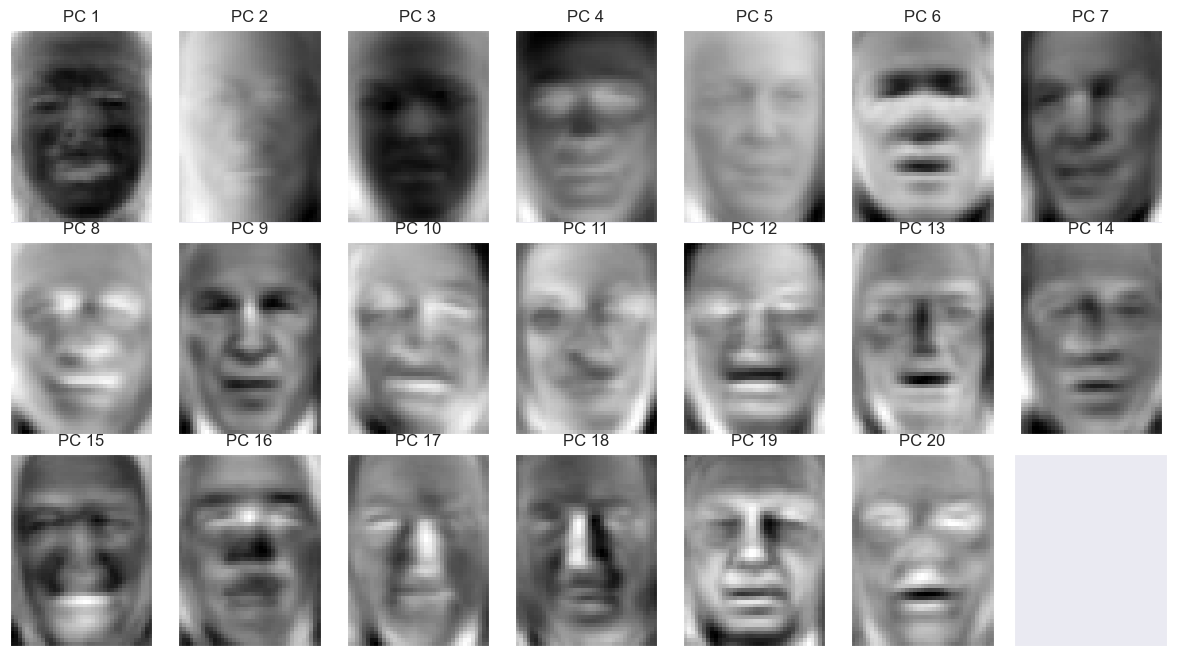

In [147]:
pca = PCA(n_components=20).fit(X_train)

fig, axes = plt.subplots(3, 7, figsize=(15, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    if i < 20:
        ax.imshow(pca.components_[i].reshape(h, w), cmap='gray')
        ax.set_title(f"PC {i+1}")

# Komentarz

Każdy obraz odpowiada kolejnym komponentom głównym (Principal Components - PCs) z PCA. Na przykład PC 1 to najważniejszy komponent główny, który wyjaśnia największą wariancję w danych, a PC 21 - dwudziesty pierwszy komponent główny, który wyjaśnia stosunkowo mniejszą część wariancji.

Pierwsze eigenfaces (np. PC 1, PC 2, PC 3) zazwyczaj kodują najbardziej ogólne cechy twarzy, takie jak kształt i rozmiar głowy, ogólny rozkład światła i cienia. One odpowiadają za ogólne właściwości, które różnicują twarze na bardzo podstawowym poziomie.
Kolejne eigenfaces zaczynają kodować bardziej specyficzne cechy, takie jak usytuowanie oczu, nosa, ust oraz konturów twarzy. Obejmują one więcej szczegółów i są wykorzystywane do rozróżniania między bardziej subtelnymi różnicami w wyrazach twarzy, kształtach i innych cechach charakterystycznych.

# Kernel PCA

## Experiment based on Kernel Principal Component Analysis and its Applications in Face Recognition and Active Shape Models, Quan Wang, https://arxiv.org/ abs/1207.3538


ostatni:
rzutowanie do porzestrzeni wielowymiarowej za pomocą funkcji jądara gdzie może nastąpić odseparowanie hiperpłaszczycnzną za pomocą trzeba wybrać dobre jądro. Jeśli do nieliniowej wybierzemy złe, to może być gorzej niż z liniową.

## Test KernelPCA dla datasetu FLW.

Literatura:

[1]. Data Mining: The Textbook, Charu C. Aggarwal, Springer 2015.
[2]. Data Mining: Concepts and Techniques, Jiawei Han, Micheline Kamber, Jian Pei, Elsevier 2012, Third Edition.
[3]. A tutorial on Principal Component Analysis: Derivation, Discussion and Singular Value Decomposition, Jon Shlens, 2013.
[4]. Kernel Principal Component Analysis and its Applications in Face Recognition and Active Shape Models, Quan Wang, https://arxiv.org/ abs/1207.3538